<a href="https://colab.research.google.com/github/AdityaSamantaroy/COVID19-prediction/blob/master/Visitors_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and path

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from sklearn.metrics import mean_absolute_error, mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
%ls

gdrive/  sample_data/


In [4]:
%cd "/content/gdrive/My Drive/Machine Learning"

/content/gdrive/My Drive/Machine Learning


In [5]:
# %mkdir flipr
%cd flipr

/content/gdrive/My Drive/Machine Learning/flipr


In [6]:
%ls

Test_dataset.xlsx  Train_dataset.xlsx  Variable_Description.xlsx


# Data Preparation

In [7]:
tdf = pd.read_excel('Test_dataset.xlsx', sheet_name = 1, header=1)
tdf.head()

,Unnamed: 0,April,May,June,July,August
0,Tuensang,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,1800363.0,2172850.0,2638469.0,2793662.0,3104060


## Handling missing values

In [8]:
tdf.columns = ['city', 'April', 'May', 'June', 'July', 'August']
# tdf.columns
tdf.head()

,city,April,May,June,July,August
0,Tuensang,1614.0,1946.0,2372.0,2500.0,2769
1,Lakshmeshwar,369179.0,445559.0,541045.0,572860.0,636502
2,Zira,140581.0,169665.0,206030.0,218138.0,242367
3,Yawal,2557179.0,3086249.0,3747597.0,3968032.0,4408916
4,Thana Bhawan,1800363.0,2172850.0,2638469.0,2793662.0,3104060


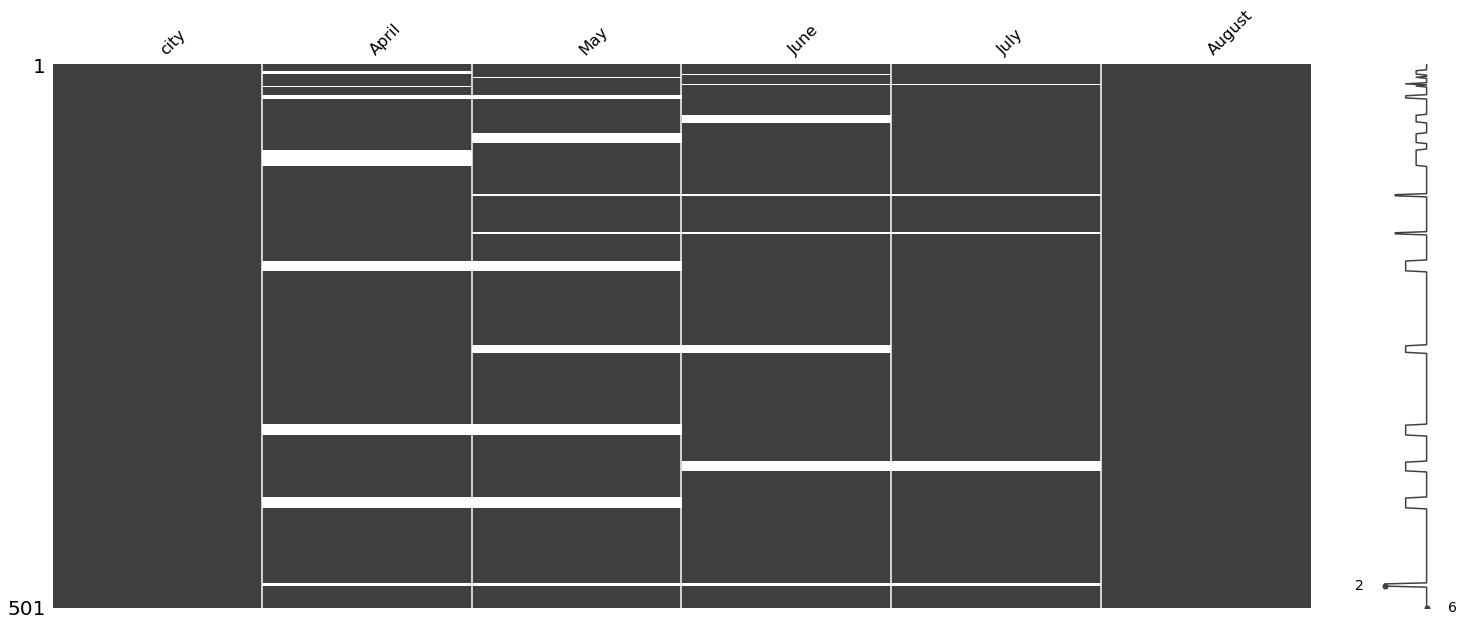

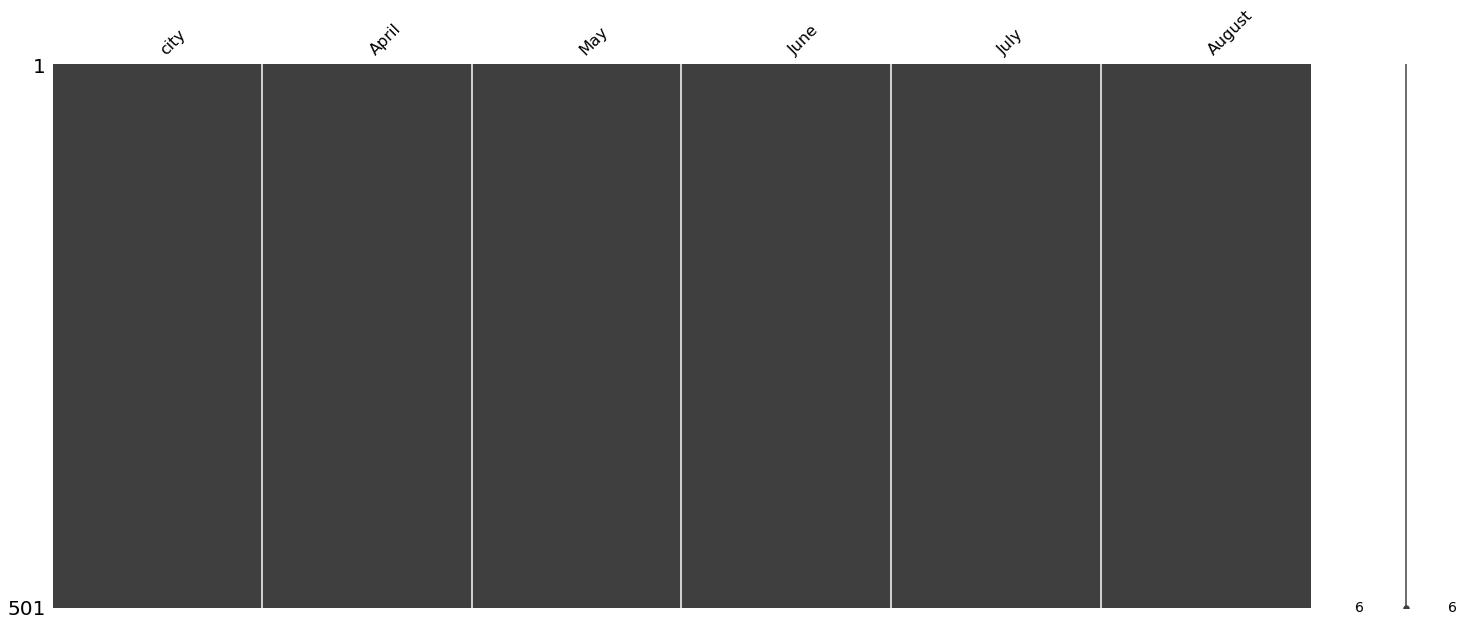

In [9]:
msno.matrix(tdf)

for i in range(1,6):
  median = tdf.iloc[:,i].median()
  tdf.iloc[:,i].fillna(median, inplace=True)

msno.matrix(tdf)

## Correlation with previous months' data

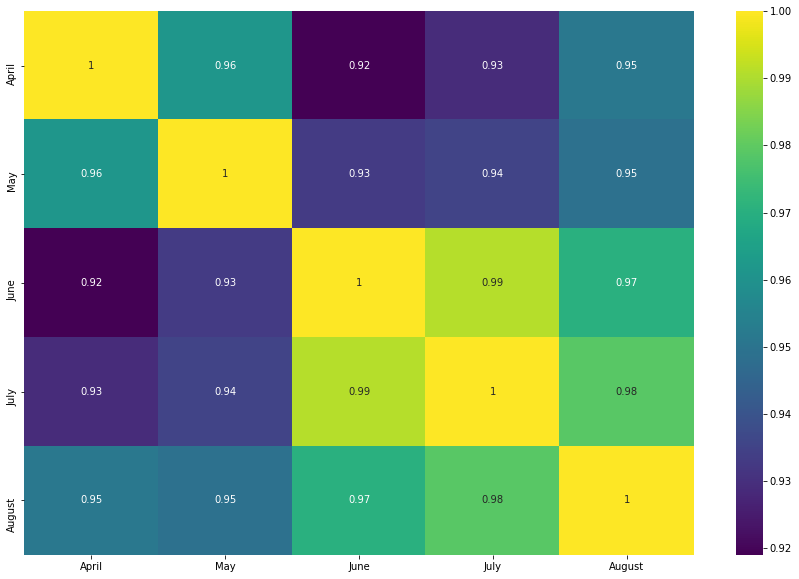

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(tdf.corr(),annot=True,cmap='viridis')

## Preparing input and output to models

In [11]:
x = np.array(tdf.iloc[:,1:5].values)
# print(x.shape)
y = tdf.iloc[:,-1]

x = x[:,:, np.newaxis]
y = y[:, np.newaxis]

minn = x.min()
maxx = x.max()

x = (x - minn)/(maxx- minn)
# print(x)

y = (y - minn)/(maxx - minn)
# print(y)

print(x.shape,y.shape)

(501, 4, 1) (501, 1)


# Time Series Model

### LSTM model, mse: 0.0040 - mae: 0.0294

In [12]:
model = tf.keras.models.Sequential([
                  tf.keras.layers.LSTM(2, input_shape = (4, 1)),
                  tf.keras.layers.Dense(3, activation="relu"),
                  tf.keras.layers.Dense(1, activation="relu")
])

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

model.fit(x=x, y=y, verbose=1, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2801 - mse: 0.2801 - mae: 0.3633
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2481 - mse: 0.2481 - mae: 0.3340
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2181 - mse: 0.2181 - mae: 0.3114
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1921 - mse: 0.1921 - mae: 0.2957
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1671 - mse: 0.1671 - mae: 0.2812
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1452 - mse: 0.1452 - mae: 0.2700
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1256 - mse: 0.1256 - mae: 0.2580
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1081 - mse: 0.1081 - mae: 0.2472
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0920 - mse: 0.0920 - mae: 0.2343
Epoch 10/100
16/16 [========

In [13]:
model.evaluate(x,y) #*(maxx - minn) + minn

16/16 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0316


[0.00393439456820488, 0.00393439456820488, 0.031572237610816956]

In [14]:
# preds = model.predict(x)*(maxx - minn) + minn

### Baseline, mse: 0.0102 rse: 0.0488

In [15]:
last = x[:,-1,:]

In [16]:
print(mean_squared_error(last,y), mean_absolute_error(last,y))

0.010203777677728435 0.048848464072459255


### MLP, mse: 0.0200 - mae: 0.0861

In [17]:
mlp = tf.keras.models.Sequential([
                  tf.keras.layers.Dense(5,activation="relu"),
                  tf.keras.layers.Dense(1, activation="relu")
])

mlp.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

mlp.fit(x=x,y=y, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952
Epoch 10/100
16/16 [========

In [18]:
mlp.evaluate(x,y) #*(maxx - minn) + minn

16/16 [==============================] - 0s 1ms/step - loss: 0.3202 - mse: 0.3202 - mae: 0.3952


[0.3202061355113983, 0.3202061355113983, 0.39516425132751465]

# Task2 data output

In [19]:
x_test = np.array(tdf.iloc[:,2:].values)
# print(x_test.shape)
# y = tdf.iloc[:,-1]

x_test = x_test[:,:, np.newaxis]
# y = y[:, np.newaxis]

# minn = x.min()
# maxx = x.max()

x_test = (x_test - minn)/(maxx- minn)
# print(x)

# y = (y - minn)/(maxx - minn)
# print(y)

print(x_test.shape)

(501, 4, 1)


In [20]:
preds = model.predict(x_test)*(maxx - minn) + minn

In [25]:
output_df = pd.read_excel('Test_dataset.xlsx', sheet_name = 0, header=0)
output_df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [26]:
output_df.shape, preds.shape

((501, 15), (501, 1))

In [27]:
output_df['Foreign Visitors'] = preds

In [28]:
output_df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,1.066507e+04
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,6.629805e+05
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,2.331244e+05
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4.743584e+06
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3.853626e+06


In [29]:
output_df.to_excel('T2Test_dataset.xlsx')